In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
unesco = pd.read_csv("/Users/erica.quintavalle/Desktop/whc-sites(tangibles)-2021.csv")
print(unesco.head())

                                        Name  \
0  L’Anse aux Meadows National Historic Site   
1                      Nahanni National Park   
2                          Galápagos Islands   
3                              City of Quito   
4                       Simien National Park   

                                   short_description  date_inscribed  danger  \
0  <p>At the tip of the Great Northern Peninsula ...            1978       0   
1  <p>Located along the South Nahanni River, one ...            1978       0   
2  <p>Situated in the Pacific Ocean some 1,000 km...            1978       0   
3  <p>Quito, the capital of Ecuador, was founded ...            1978       0   
4  <p>Massive erosion over the years on the Ethio...            1978       0   

   date_end   longitude   latitude  area_hectares category_long  \
0       NaN  -55.616667  51.466667        7991.00      Cultural   
1       NaN -125.589444  61.547222      476560.00       Natural   
2    2010.0  -90.501319  -0.6

In [3]:
#First exploration of the dataset
print(unesco.info())
print(unesco.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1155 non-null   object 
 1   short_description  1155 non-null   object 
 2   date_inscribed     1155 non-null   int64  
 3   danger             1155 non-null   int64  
 4   date_end           41 non-null     float64
 5   longitude          1155 non-null   float64
 6   latitude           1155 non-null   float64
 7   area_hectares      1135 non-null   float64
 8   category_long      1155 non-null   object 
 9   category_short     1155 non-null   object 
 10  Country name       1155 non-null   object 
 11  Region             1155 non-null   object 
 12  iso_code           1154 non-null   object 
 13  transboundary      1155 non-null   int64  
 14  rev_bis            263 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 135.5+ KB
None
(1155, 1

In [4]:
#Delete unnecessary columns
unesco = unesco.drop(["short_description", "transboundary", "rev_bis"], axis=1)
print(unesco.head())

                                        Name  date_inscribed  danger  \
0  L’Anse aux Meadows National Historic Site            1978       0   
1                      Nahanni National Park            1978       0   
2                          Galápagos Islands            1978       0   
3                              City of Quito            1978       0   
4                       Simien National Park            1978       0   

   date_end   longitude   latitude  area_hectares category_long  \
0       NaN  -55.616667  51.466667        7991.00      Cultural   
1       NaN -125.589444  61.547222      476560.00       Natural   
2    2010.0  -90.501319  -0.689860    14066514.00       Natural   
3       NaN  -78.512083  -0.220000          70.43      Cultural   
4    2017.0   38.066667  13.183333       13600.00       Natural   

  category_short Country name                           Region iso_code  
0              C       Canada         Europe and North America       ca  
1              N

In [5]:
#Missing values
unesco.isna().sum()

Name                 0
date_inscribed       0
danger               0
date_end          1114
longitude            0
latitude             0
area_hectares       20
category_long        0
category_short       0
Country name         0
Region               0
iso_code             1
dtype: int64

In [6]:
#We can't drop all missing values, but we drop missing values for some columns.
unesco_clean = unesco.dropna(subset=['iso_code', 'area_hectares'])
print(unesco_clean.shape)

(1134, 12)


In [7]:
#We will now merge our DataFrame with another DD containing the aread of each Region (in million sq km)
#The areas were extracted manually from wikipedia.en

region_area_dict = {"Europe and North America" : 34.89, "Latin America and the Caribbean" : 20.39, "Africa" : 30.22, "Arab States" : 13.13, "Asia and the Pacific" : 209.83}
region_area_df = pd.DataFrame(
                [{"Region": key, "Region_area": value} for key, value in region_area_dict.items()])
print(region_area_df)

                            Region  Region_area
0         Europe and North America        34.89
1  Latin America and the Caribbean        20.39
2                           Africa        30.22
3                      Arab States        13.13
4             Asia and the Pacific       209.83


In [8]:
unesco_final = unesco_clean.merge(region_area_df, on="Region")
print(unesco_final.head())

                                        Name  date_inscribed  danger  \
0  L’Anse aux Meadows National Historic Site            1978       0   
1                      Nahanni National Park            1978       0   
2                          Aachen Cathedral             1978       0   
3                  Historic Centre of Kraków            1978       0   
4     Wieliczka and Bochnia Royal Salt Mines            1978       0   

   date_end   longitude   latitude  area_hectares category_long  \
0       NaN  -55.616667  51.466667       7991.000      Cultural   
1       NaN -125.589444  61.547222     476560.000       Natural   
2       NaN    6.084444  50.774444          0.200      Cultural   
3       NaN   19.937222  50.061389        149.650      Cultural   
4    1998.0   20.063889  49.979167       1104.947      Cultural   

  category_short Country name                    Region iso_code  Region_area  
0              C       Canada  Europe and North America       ca        34.89  
1   

In [9]:
#Adding a column
unesco_final["area_sq_km"] = unesco_final["area_hectares"] * (10 ** -14)
print(unesco_final.head())

                                        Name  date_inscribed  danger  \
0  L’Anse aux Meadows National Historic Site            1978       0   
1                      Nahanni National Park            1978       0   
2                          Aachen Cathedral             1978       0   
3                  Historic Centre of Kraków            1978       0   
4     Wieliczka and Bochnia Royal Salt Mines            1978       0   

   date_end   longitude   latitude  area_hectares category_long  \
0       NaN  -55.616667  51.466667       7991.000      Cultural   
1       NaN -125.589444  61.547222     476560.000       Natural   
2       NaN    6.084444  50.774444          0.200      Cultural   
3       NaN   19.937222  50.061389        149.650      Cultural   
4    1998.0   20.063889  49.979167       1104.947      Cultural   

  category_short Country name                    Region iso_code  Region_area  \
0              C       Canada  Europe and North America       ca        34.89   
1 

In [10]:
#Indexing and sorting in descending order
unesco_ind = unesco_final.set_index(["Region", "date_inscribed"])
unesco_ind.sort_index()
print(unesco_ind)

                                                                                      Name  \
Region                   date_inscribed                                                      
Europe and North America 1978                    L’Anse aux Meadows National Historic Site   
                         1978                                        Nahanni National Park   
                         1978                                            Aachen Cathedral    
                         1978                                    Historic Centre of Kraków   
                         1978                       Wieliczka and Bochnia Royal Salt Mines   
...                                                                                    ...   
Asia and the Pacific     2021                      Cultural Landscape of Hawraman/Uramanat   
                         2021            Amami-Oshima Island, Tokunoshima Island, North...   
                         2021                    Jomon Prehi

In [11]:
#How many endagered sites per Region?
unesco_danger_per_region = unesco_final.groupby("Region")["danger"].agg(sum)
print(unesco_danger_per_region)

Region
Africa                             15
Arab States                        18
Asia and the Pacific                6
Europe and North America            3
Latin America and the Caribbean     6
Name: danger, dtype: int64


In [12]:
#Subsetting through NumPy: how many African UNESCO sites were inscribed in the last 10 years?
unesco_africa_since_2011 = unesco_final[np.logical_and(unesco_final["Region"] == "Africa", unesco_final["date_inscribed"] >= 2011)]
print(unesco_africa_since_2011)

                                                  Name  date_inscribed  \
756                           Konso Cultural Landscape            2011   
757         Kenya Lake System in the Great Rift Valley            2011   
758                                Fort Jesus, Mombasa            2011   
759                                       Saloum Delta            2011   
760                                  Lakes of Ounianga            2012   
761                      Historic Town of Grand-Bassam            2012   
762  Bassari Country: Bassari, Fula and Bedik Cultu...            2012   
763                                 Sangha Trinational            2012   
764                                     Namib Sand Sea            2013   
765                          Historic Centre of Agadez            2013   
766                                     Okavango Delta            2014   
767      Ennedi Massif: Natural and Cultural Landscape            2016   
768  Mbanza Kongo, Vestiges of the Cap

In [13]:
#Slicing through loc/iloc: which are the natural UNESCO sites in Italy?
unesco_srt = unesco_final.set_index(["category_long", 'Country name']).sort_index()
unesco_srt.loc["Natural", "Italy"]

Name  date_inscribed  \
category_long Country name                                                  
Natural       Italy         Isole Eolie (Aeolian Islands)            2000   
              Italy                         The Dolomites            2009   
              Italy                            Mount Etna            2013   

                            danger  date_end  longitude   latitude  \
category_long Country name                                           
Natural       Italy              0       NaN  14.945583  38.487861   
              Italy              0       NaN  12.163056  46.613056   
              Italy              0       NaN  14.996667  37.756111   

                            area_hectares category_short  \
category_long Country name                                 
Natural       Italy                1216.0              N   
              Italy              141902.8              N   
              Italy               19237.0              N   

                                              Region iso_code  Region_area  \
category_long Country name                                                   
Natural       Italy         Europe and North America       it        34.89   
              Italy         Europe and North America       it        34.89   
              Italy         Europe and North America       it        34.89   

                              area_sq_km  
category_long Country name                
Natural       Italy         1.216000e-11  
              Italy         1.419028e-09  
              Italy         1.923700e-10

In [14]:
#Looping & dictionaries
unesco_2021 = unesco_final[unesco_final["date_inscribed"] == 2021]
unesco_2021["Region"].value_counts()

Europe and North America           12
Asia and the Pacific                9
Latin America and the Caribbean     4
Arab States                         2
Africa                              2
Name: Region, dtype: int64

In [15]:
Regions_2021 = {"Latin America and the Caribbean": 4, "Asia and the Pacific": 9, "Africa": 2, "Europe and North America": 12, "Arab States":2}

for key, value in Regions_2021.items():
    print("In 2021, the percentage of UNESCO sites in " + key + " was " + str(value/29*100))

In 2021, the percentage of UNESCO sites in Latin America and the Caribbean was 13.793103448275861
In 2021, the percentage of UNESCO sites in Asia and the Pacific was 31.03448275862069
In 2021, the percentage of UNESCO sites in Africa was 6.896551724137931
In 2021, the percentage of UNESCO sites in Europe and North America was 41.37931034482759
In 2021, the percentage of UNESCO sites in Arab States was 6.896551724137931


In [16]:
#Iterrows
for i, row in unesco_2021.iterrows():
    print(i)

520
521
522
523
524
525
526
527
528
529
530
531
674
675
676
677
774
775
856
857
1122
1123
1124
1125
1126
1127
1128
1129
1130


In [17]:
#Custom function 
def welcome_new(year, country):  
    print ('For the first time in', year, 'a UNESCO site was added in', country)

print(welcome_new(2013, 'Fiji'))

For the first time in 2013 a UNESCO site was added in Fiji
None


In [18]:
#Figure 1: how many UNESCO sites per Region? We use a pie chart, where the slices are ordered and plotted counter-clockwise:
unesco_final["Region"].value_counts()

Europe and North America           532
Asia and the Pacific               273
Latin America and the Caribbean    146
Africa                              98
Arab States                         82
Name: Region, dtype: int64

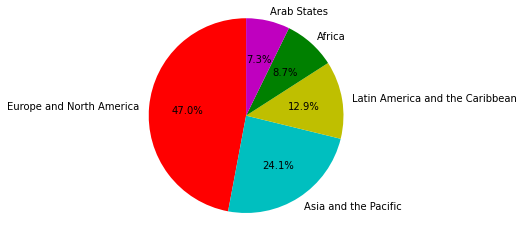

<Figure size 432x288 with 0 Axes>

In [19]:
labels = ["Europe and North America", "Asia and the Pacific", "Latin America and the Caribbean", "Africa", "Arab States"]
sizes = [532, 273, 146, 98, 82]

fig1, ax1 = plt.subplots()
f1 = ax1.pie(sizes, labels=labels, colors=['r', 'c', 'y', 'g', 'm'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()
plt.tight_layout()
plt.savefig("Figure1.png")

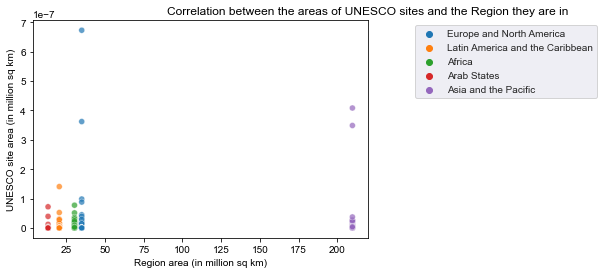

<Figure size 432x288 with 0 Axes>

In [20]:
#Figure 2: Is there a correlation between the UNESCO site area and the Region area? Are larger sites in larger regions?
fig, ax = plt.subplots()
sns.set_style("darkgrid")

f2 = sns.scatterplot(x="Region_area", y="area_sq_km", data=unesco_final, hue="Region", palette="tab10", alpha=0.7)
ax.set(xlabel="Region area (in million sq km)", ylabel="UNESCO site area (in million sq km)", title="Correlation between the areas of UNESCO sites and the Region they are in")
ax.title.set_position([1,1.2])
plt.legend(bbox_to_anchor=(1.7, 1), loc="upper right")
plt.show()
plt.savefig("Figure2.png", dpi=500)

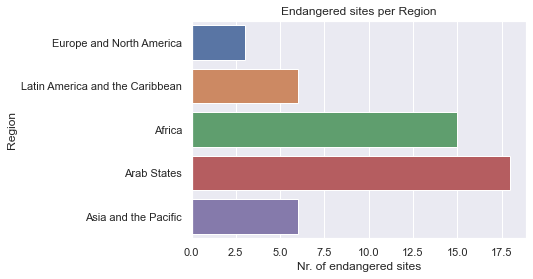

<Figure size 432x288 with 0 Axes>

In [21]:
#Figure 3: In which Region do we find more endangered sites?

unesco_final_endangered = unesco_final[(unesco_final['danger'] == 1)]
sns.set_theme(style="darkgrid")

f3 = sns.countplot(y="Region", data=unesco_final_endangered)
f3.set_title("Endangered sites per Region")
f3.set(xlabel="Nr. of endangered sites", ylabel="Region")
plt.show()
plt.savefig("Figure3.png", dpi=500)


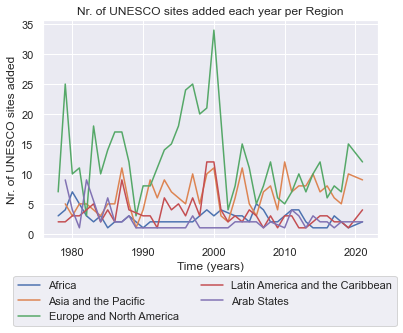

<Figure size 432x288 with 0 Axes>

In [22]:
#Figure 4: How many sites per Region were added through the years? Is there homogeneity among the Regions?
#Besides, is the number of added sites within the Region stable through the years?

ax, fig = plt.subplots()

unesco_africa = unesco_final[unesco_final["Region"] == 'Africa']
unesco_asia = unesco_final[unesco_final["Region"] == 'Asia and the Pacific']
unesco_europe = unesco_final[unesco_final["Region"] == 'Europe and North America']
unesco_latinamerica = unesco_final[unesco_final["Region"] == 'Latin America and the Caribbean']
unesco_arabstates = unesco_final[unesco_final["Region"] == 'Arab States']

unesco_africa.groupby(unesco_africa['date_inscribed']).size().plot()
unesco_asia.groupby(unesco_asia['date_inscribed']).size().plot()
unesco_europe.groupby(unesco_europe['date_inscribed']).size().plot()
unesco_latinamerica.groupby(unesco_latinamerica['date_inscribed']).size().plot()
unesco_arabstates.groupby(unesco_arabstates['date_inscribed']).size().plot()

plt.title("Nr. of UNESCO sites added each year per Region")
plt.ylabel("Nr. of UNESCO sites added")
plt.xlabel("Time (years)")
ax.legend(['Africa', 'Asia and the Pacific', 'Europe and North America', 'Latin America and the Caribbean', 'Arab States'], loc="lower center", bbox_to_anchor=(0.5, -0.20), ncol= 2)
plt.show()
plt.savefig("Figure4.png", dpi=500)

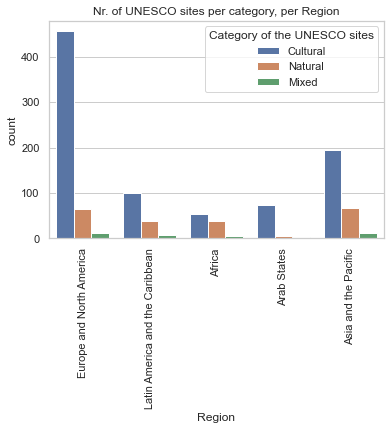

<Figure size 432x288 with 0 Axes>

In [23]:
#Figure 5: What categories of sites do we find in the Regions?

sns.set_theme(style="whitegrid")
f5 = sns.countplot(x="Region", hue="category_long", data=unesco_final)
plt.xticks(rotation='vertical')

f5.set(title="Nr. of UNESCO sites per category, per Region", xlabel="Region", ylabel="count")
plt.legend(title="Category of the UNESCO sites")

plt.show()
plt.savefig("Figure5.png", dpi=500)